In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(ggplot2)
library(ggpubr)

In [3]:
df = read.csv("/data/work/MASSON/SR_20241021.csv")
df = df[!is.na(df$SR),]
df$Group = factor(df$Group, levels=c("E16.5", "E17.5", "E18.5", "P0", "P5", "Adult"))
head(df)

,Group,Wound,SR
,<fct>,<chr>,<dbl>
1,Adult,Control,1.833001
2,Adult,Control,1.768298
3,Adult,Control,1.753054
4,Adult,Wound,2.578277
5,Adult,Wound,3.204944
6,Adult,Wound,3.340301


In [4]:
# 复制 P0 Control 行并分配到 E16.5, E17.5, E18.5 组
df_control <- df %>% filter(Group == "P0")
df_control <- bind_rows(df_control,df_control, df_control)
df_control <- df_control %>% mutate(Group = factor(rep(c("E16.5", "E17.5", "E18.5"),each = 3)))
df_combined <- bind_rows(filter(df, Group != "P0"), df_control)

In [5]:
df_summary <- df_combined %>%
  group_by(Group, Wound) %>%
  summarise(Mean = mean(SR), SE = sd(SR) / sqrt(n()))
df_summary

`summarise()` has grouped output by 'Group'. You can override using the
`.groups` argument.


Group,Wound,Mean,SE
<fct>,<chr>,<dbl>,<dbl>
E16.5,Control,1.550032,0.07932972
E16.5,Periwound,1.280377,0.02844325
E16.5,Wound,1.549037,0.07651308
E17.5,Control,1.550032,0.07932972
E17.5,Periwound,1.775916,0.08363468
E17.5,Wound,1.795464,0.08996248
E18.5,Control,1.550032,0.07932972
E18.5,Periwound,1.187683,0.02924069
E18.5,Wound,1.354118,0.08417868


In [6]:
# 绘制柱状图
p <- ggplot(df_summary, aes(x = Group, y = Mean, color = Wound)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width = 0.75, fill='white')+
  geom_errorbar(aes(ymin = Mean - SE, ymax = Mean + SE), 
                position = position_dodge(width = 0.8), width = 0.25) +
  geom_point(data = df_combined, aes(x = Group, y = SR, fill = Wound), 
             position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.8), size = 2) +
  labs(title = "", x = "", y = "Collagen I/III ratio")  +
  scale_y_continuous(limits = c(0, 4)) + 
  scale_color_manual(values = c("black","#159DC0", "#EE4143"))# +
  # scale_pattern_manual(values = c("none", "stripe")) +
  geom_blank()


science_theme <- theme(
  panel.background = element_blank(),  # 去除背景
  panel.grid.major = element_blank(),  # 去除主网格线
  panel.grid.minor = element_blank(),  # 去除次网格线
  axis.line = element_line(color = "black"),  # 坐标轴线颜色
  axis.ticks = element_line(color = "black"),  # 坐标轴刻度线颜色
  axis.text = element_text(size = 12, color = "black"),  # 坐标轴文字大小和颜色
  axis.title = element_text(size = 14, face = "bold"),  # 坐标轴标题大小和加粗
  plot.title = element_text(size = 16, face = "bold", hjust = 0.5),  # 图标题大小、加粗和居中
  legend.position = "none"  # 去除图例
)

p <- p + science_theme

geom_blank: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

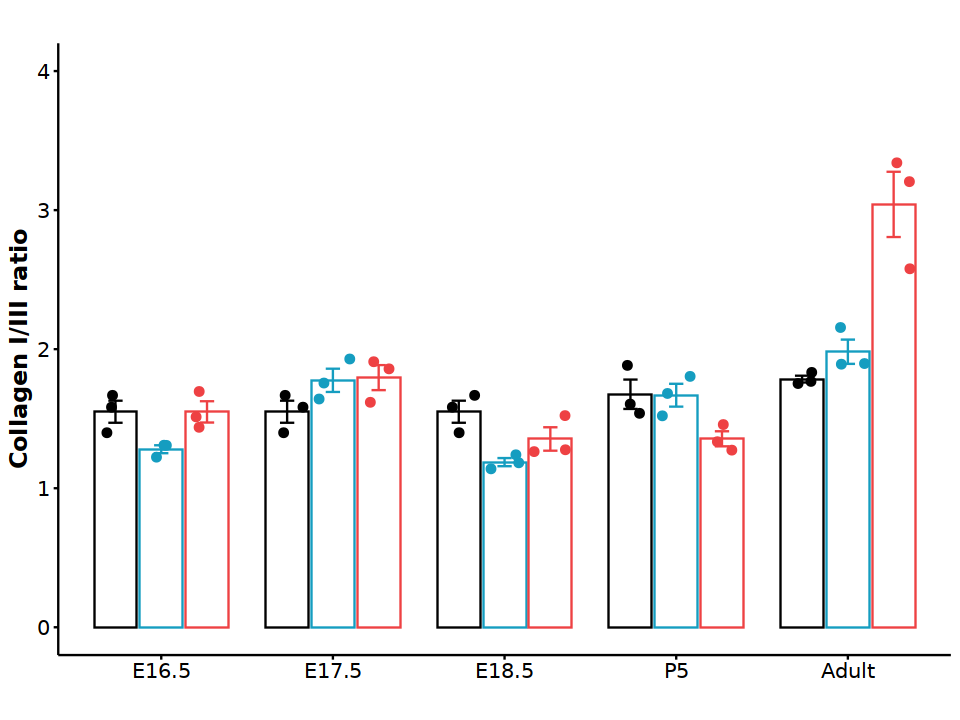

In [7]:
options(repr.plot.width=8, repr.plot.height=6)
p

In [8]:
ggsave("SR_bar_241021.pdf", width=7, height=5)

In [9]:
install.packages("agricolae")

Updating HTML index of packages in '.Library'

Warning message in file.create(f.tg):
“cannot create file '/opt/conda/lib/R/doc/html/packages.html', reason 'Permission denied'”
Warning message in make.packages.html(.Library):
“cannot update HTML package index”


In [10]:
library(agricolae)

In [11]:
fit = aov(SR ~ Wound * Group, data=df)

In [12]:
result_O = HSD.test(fit,c("Wound", "Group"), group = T)
print(result_O)

$statistics
     MSerror Df     Mean       CV      MSD
  0.02771806 26 1.692341 9.837698 0.493998

$parameters
   test      name.t ntr StudentizedRange alpha
  Tukey Wound:Group  13         5.139305  0.05

$means
                      SR        std r         se      Min      Max      Q25
Control:Adult   1.784784 0.04244679 3 0.09612156 1.753054 1.833001 1.760676
Control:P0      1.550032 0.13740310 3 0.09612156 1.399151 1.667967 1.491065
Control:P5      1.675827 0.18292070 3 0.09612156 1.538778 1.883539 1.571971
Periwound:Adult 1.981606 0.15106126 3 0.09612156 1.892047 2.156015 1.894401
Periwound:E16.5 1.280377 0.04926515 3 0.09612156 1.223495 1.309439 1.265846
Periwound:E17.5 1.775916 0.14485952 3 0.09612156 1.641699 1.929475 1.699137
Periwound:E18.5 1.187683 0.05064636 3 0.09612156 1.139547 1.240513 1.161268
Periwound:P5    1.668919 0.14220516 3 0.09612156 1.520785 1.804342 1.601207
Wound:Adult     3.041174 0.40655283 3 0.09612156 2.578277 3.340301 2.891610
Wound:E16.5     1.549037 0.